# Water Treatment Plant

## Mengimport library yang dibutuhkan

In [569]:
import pandas as pd # used for handling the dataset
import numpy as np # used for handling numbers
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.cluster import KMeans # used for clustering (testing only)
from scipy.spatial.distance import cdist # used for calculating the distance
import matplotlib.pyplot as plt # used for plotting the graph
import seaborn as sns # used for plotting interactive graph

## Mengimport dataset

In [570]:
dataset = pd.read_csv('water-treatment.data', header=None)
# Masukkan nama kolom
dataset.columns = ['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']
dataset.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


## Data preprocessing

In [571]:
# Replace '?' dengan NaN
dataset = dataset.replace('?', np.NaN)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      527 non-null    object 
 1   Q-E       509 non-null    object 
 2   ZN-E      524 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     504 non-null    object 
 5   DQO-E     521 non-null    object 
 6   SS-E      526 non-null    object 
 7   SSV-E     516 non-null    object 
 8   SED-E     502 non-null    object 
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     487 non-null    object 
 12  SS-P      527 non-null    int64  
 13  SSV-P     516 non-null    object 
 14  SED-P     503 non-null    object 
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     499 non-null    object 
 18  DQO-D     518 non-null    object 
 19  SS-D      525 non-null    object 
 20  SSV-D     514 non-null    object

In [572]:
# Ganti nilai NaN dengan nilai modus
dataset = dataset.fillna(dataset.mode().iloc[0])
# Ubah data kategorikal menjadi numerik
dataset = dataset.astype({'Q-E': 'float64', 'ZN-E': 'float64', 'PH-E': 'float64', 'DBO-E': 'float64', 'DQO-E': 'float64', 'SS-E': 'float64', 'SSV-E': 'float64', 'SED-E': 'float64', 'COND-E': 'float64', 'PH-P': 'float64', 'DBO-P': 'float64', 'SS-P': 'float64', 'SSV-P': 'float64', 'SED-P': 'float64', 'COND-P': 'float64', 'PH-D': 'float64', 'DBO-D': 'float64', 'DQO-D': 'float64', 'SS-D': 'float64', 'SSV-D': 'float64', 'SED-D': 'float64', 'COND-D': 'float64', 'PH-S': 'float64', 'DBO-S': 'float64', 'DQO-S': 'float64', 'SS-S': 'float64', 'SSV-S': 'float64', 'SED-S': 'float64', 'COND-S': 'float64', 'RD-DBO-P': 'float64', 'RD-SS-P': 'float64', 'RD-SED-P': 'float64', 'RD-DBO-S': 'float64', 'RD-DQO-S': 'float64', 'RD-DBO-G': 'float64', 'RD-DQO-G': 'float64', 'RD-SS-G': 'float64', 'RD-SED-G': 'float64'})

print("NULL Values in the dataset: ", dataset.isnull().sum().sum())

NULL Values in the dataset:  0


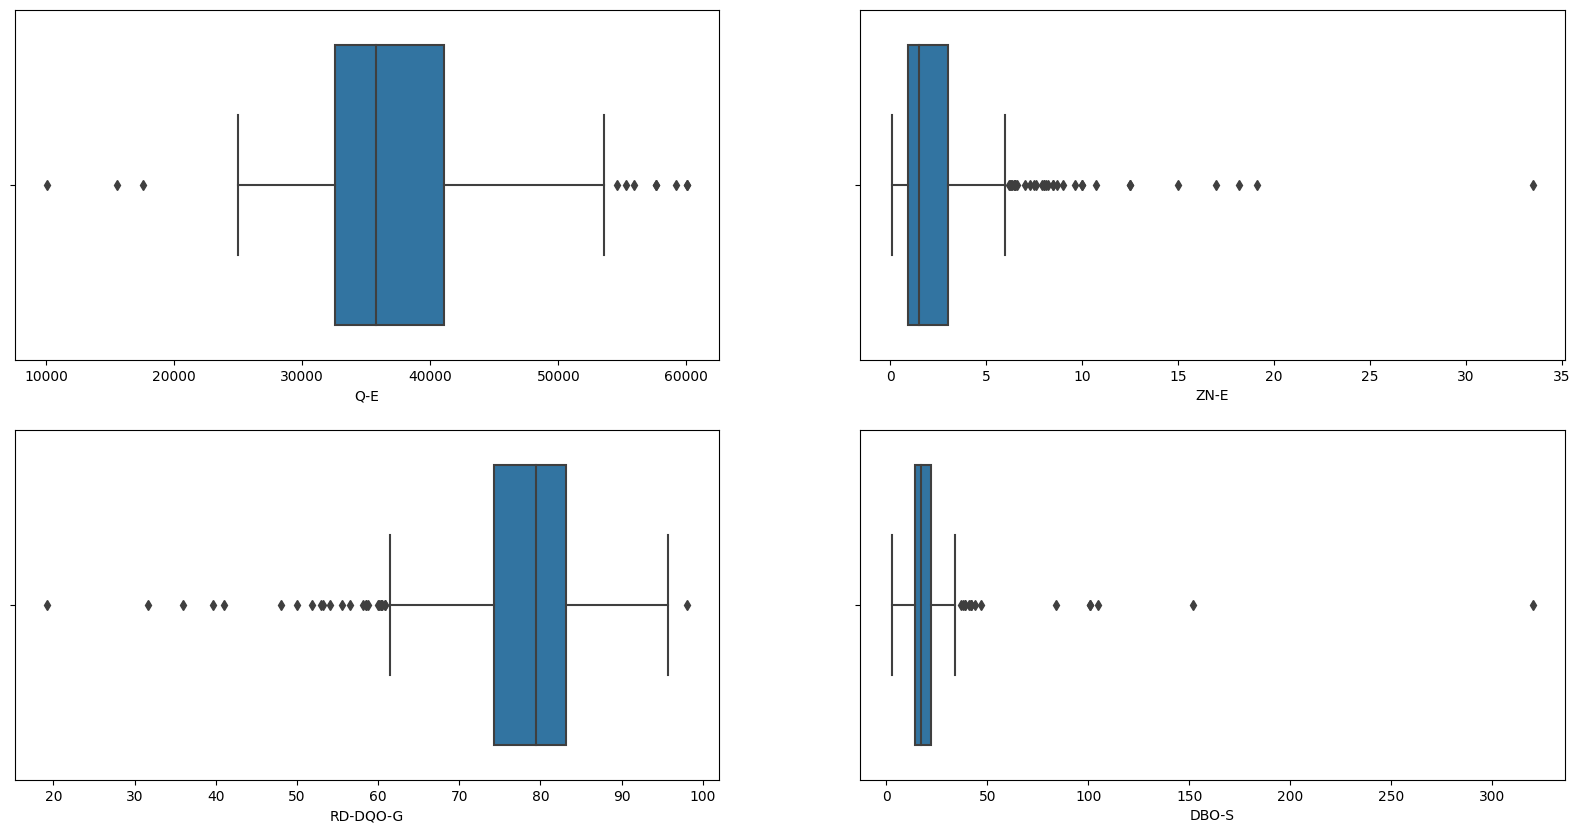

In [573]:
# Perlihatkan boxplot beberapa kolom untuk melihat outlier
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=dataset['Q-E'])
plt.subplot(2, 2, 2)
sns.boxplot(x=dataset['ZN-E'])
plt.subplot(2, 2, 3)
sns.boxplot(x=dataset['RD-DQO-G'])
plt.subplot(2, 2, 4)
sns.boxplot(x=dataset['DBO-S'])
plt.show()

Bisa dilihat banyak outliers, maka tadi kita mengisi missing value dengan median, karena median tidak terpengaruh oleh outliers. 

Selanjutnya kita akan menghilangkan outliers dengan menggunakan metode IQR (Interquartile Range) karena outliers akan berpengaruh buruk dengan hasil prediksi algoritma KMeans.

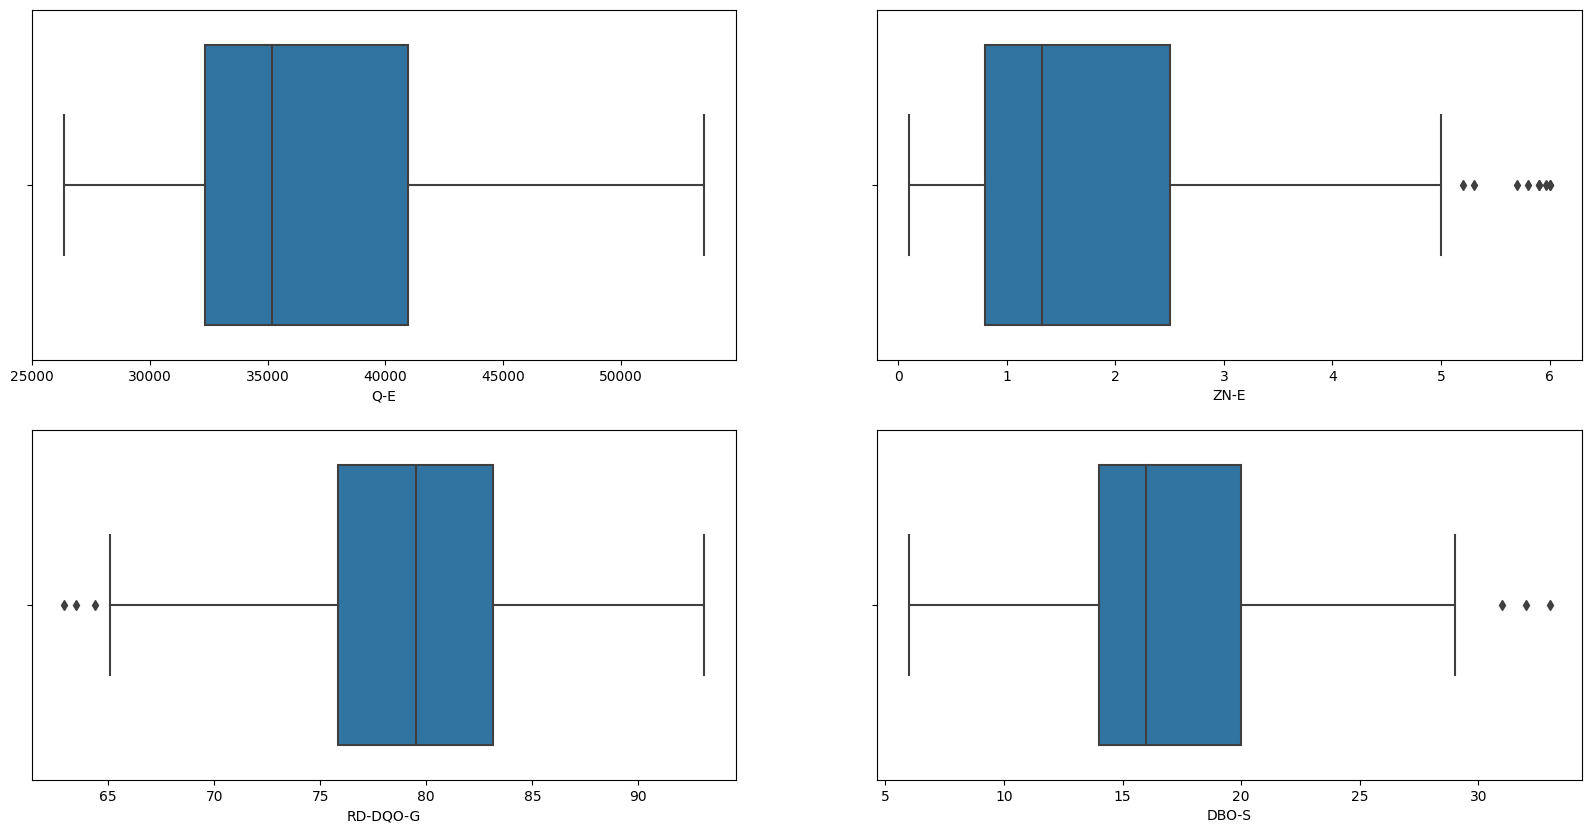

In [574]:
# Hapus kolom Date karena tidak digunakan oleh model
dataset = dataset.drop(['Date'], axis=1)
# Hapus outliers dengan metode IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=dataset['Q-E'])
plt.subplot(2, 2, 2)
sns.boxplot(x=dataset['ZN-E'])
plt.subplot(2, 2, 3)
sns.boxplot(x=dataset['RD-DQO-G'])
plt.subplot(2, 2, 4)
sns.boxplot(x=dataset['DBO-S'])
plt.show()

In [575]:
# Scaling data dengan StandardScaler
scaler = StandardScaler()
# Scale dataset
dataset = scaler.fit_transform(dataset)
# Ubah dataset menjadi dataframe
dataset = pd.DataFrame(dataset)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.160591,-0.219571,-0.079612,-1.018267,0.137409,-0.636349,0.182241,0.247540,1.911722,0.267805,...,1.773650,-0.104411,0.093789,0.684080,0.031217,-0.089329,0.001703,-0.000758,-0.735747,-0.278549
1,0.010637,-0.219571,0.749001,1.168623,1.055693,-0.400835,0.010379,-0.132717,1.911722,0.267805,...,2.169754,-0.104411,0.495309,0.707213,0.031217,0.048641,0.603011,-0.211489,-0.679116,-0.562669
2,0.274692,0.850040,-0.079612,0.366095,-0.223714,-0.165321,0.468676,0.247540,0.532787,-0.190519,...,0.994647,-0.104411,0.186447,0.915403,0.335430,1.055824,-0.065109,-1.107098,-1.415307,0.857931
3,0.682151,2.989262,-0.079612,-1.018267,1.633489,1.624583,-0.069823,0.627798,0.411464,-0.190519,...,0.793294,-0.104411,0.412946,0.290832,0.943856,1.262780,0.001703,1.193388,0.057074,-1.983270
4,-1.234011,0.493503,-0.493918,0.446347,0.591392,0.023090,0.503049,0.247540,-0.636053,-0.648842,...,-0.411520,0.618577,-1.471110,-0.009888,0.056568,-1.717378,0.636417,-0.984171,0.085389,-0.846789


In [576]:
# Dimensionality Reduction dengan feature extraction menggunakan PCA (Principal Component Analysis)
# untuk mendapatkan 2 atribut yang akan digunakan untuk plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataset = pca.fit_transform(dataset)
# Ubah dataset menjadi dataframe
dataset = pd.DataFrame(dataset, columns=['PC1', 'PC2'])

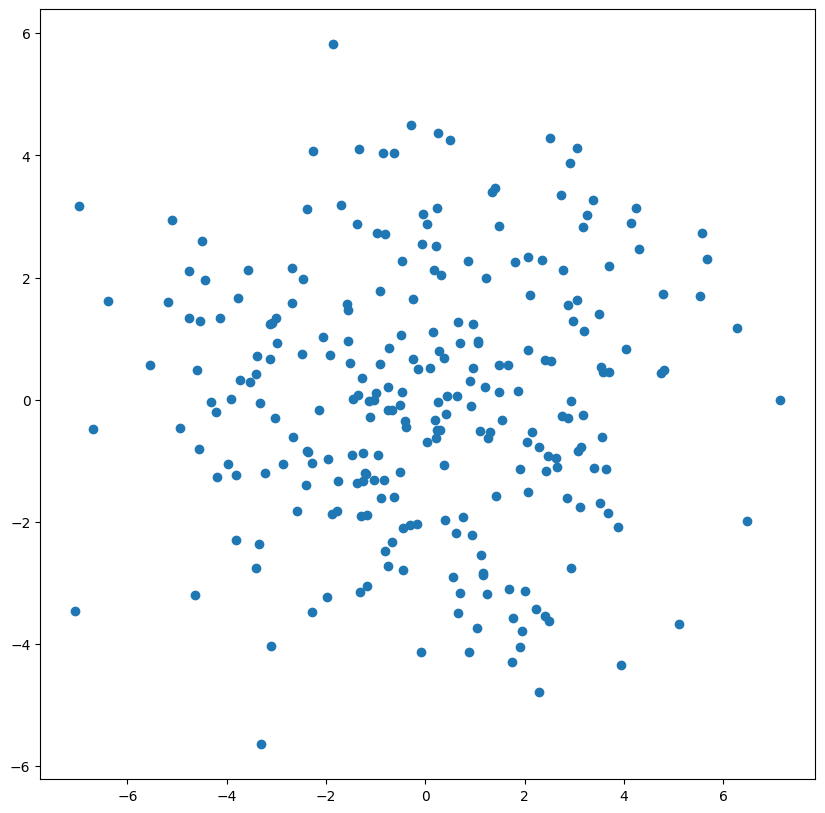

In [577]:
# Perlihatkan scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(dataset['PC1'], dataset['PC2'])
plt.show()

In [578]:
# Dataset setelah dipreprocessing
dataset

,PC1,PC2
0,1.662117,0.568926
1,2.871017,-0.304917
2,3.067903,-0.832690
3,3.514065,-1.684800
4,0.042779,-0.692582
...,...,...
250,-5.098581,2.944439
251,-2.665325,-0.603254
252,-3.340590,-2.354367
253,-1.312232,-3.154961


## Menggunakan algoritma KMeans dari library sklearn

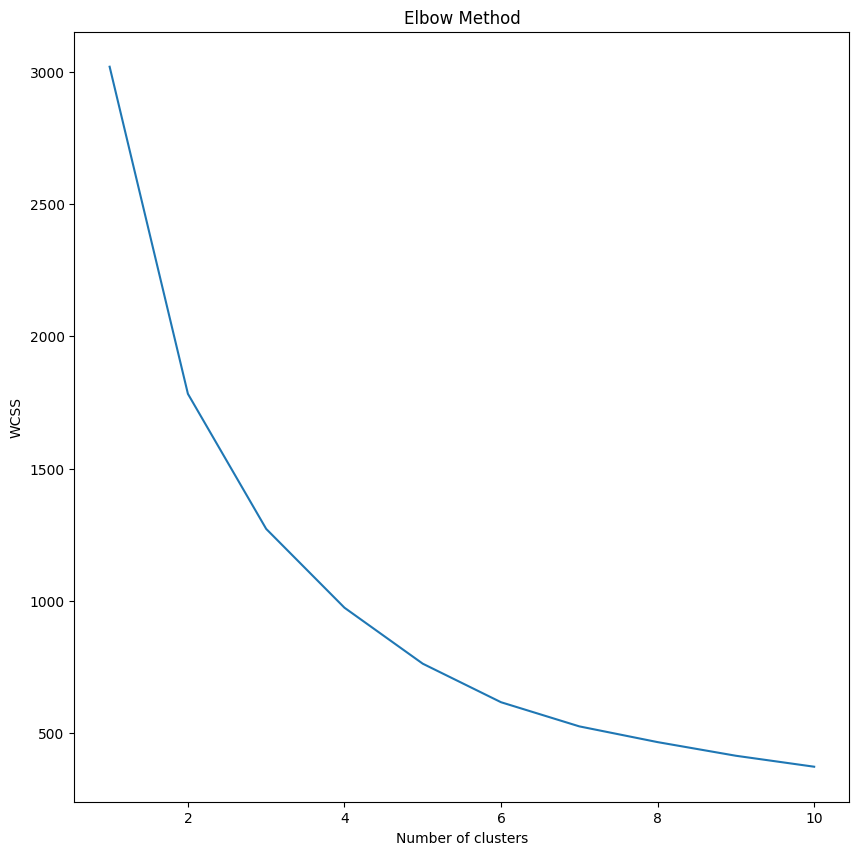

In [579]:
# Menentukan jumlah cluster dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Implementasi KMeans Clustering dari scratch

In [580]:
def kmeans(data, k):
    # Inisialisasi centroid dengan nilai random
    idx = np.random.choice(len(data), k, replace=False)
    centroids = data[idx, :]

    # Menghitung jarak antara centroid dan semua titik data
    distances = cdist(data, centroids ,'euclidean')

    # Mencari centroid dengan distance paling kecil
    points = np.array([np.argmin(i) for i in distances])

    # Melakukan iterasi sampai tidak ada perubahan
    while True:
        centroids_temp = centroids
        centroids = []
        for idx in range(k):
            # Mengupdate centroid dengan rata-rata dari cluster
            temp_cent = data[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)
        if np.array_equal(centroids, centroids_temp):
            break

        distances = cdist(data, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points, centroids

## Membandingkan hasil

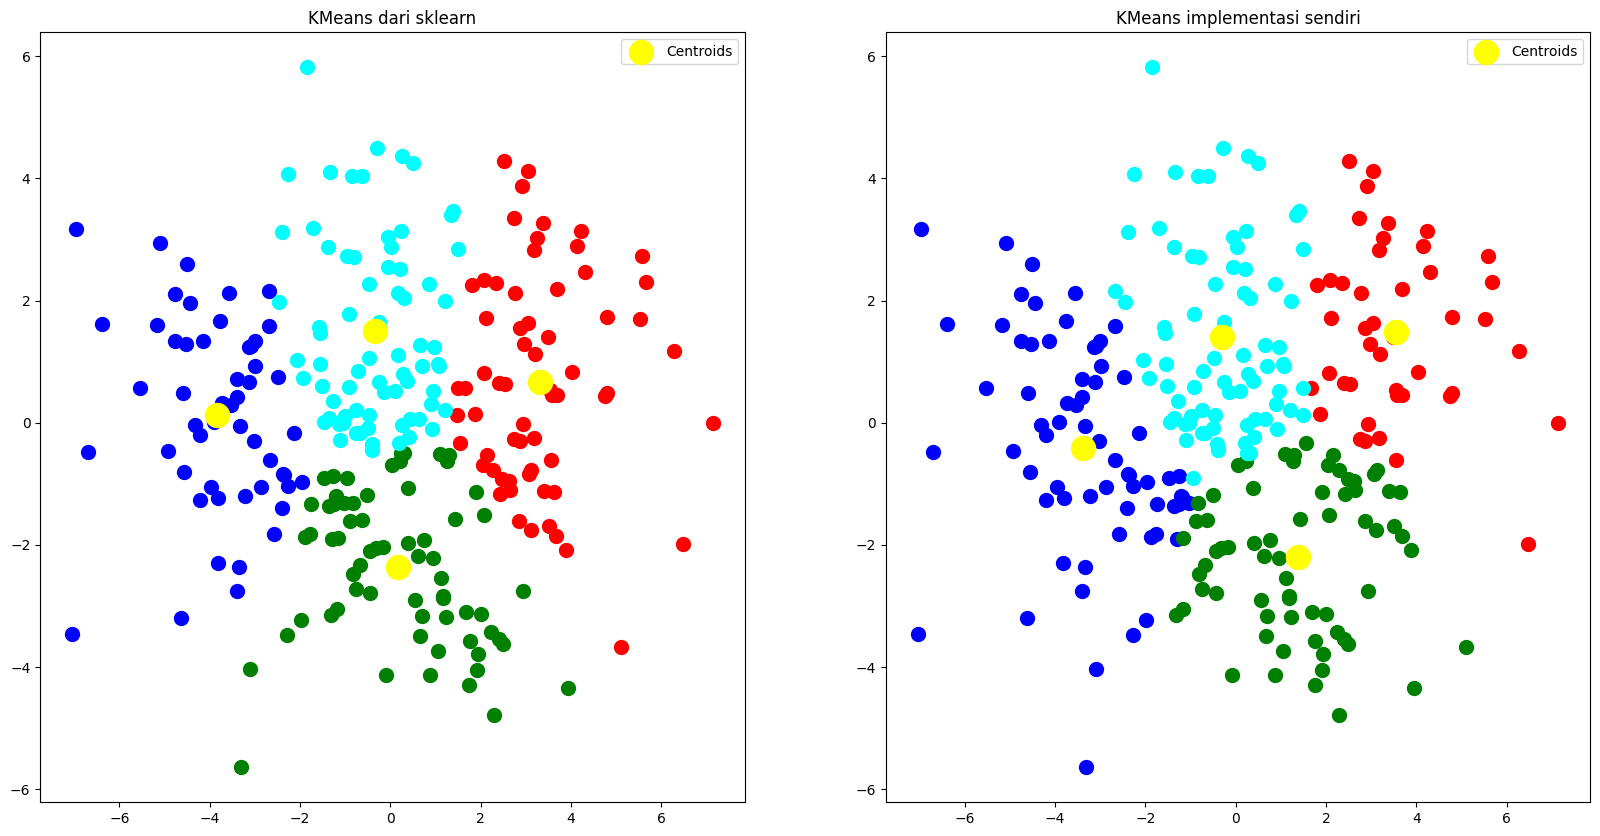

Jumlah anggota setiap kluster:

KMeans dari sklearn
3    72
2    67
0    64
1    52
dtype: int64
KMeans implementasi sendiri
3    78
2    67
1    66
0    44
dtype: int64


Centroid setiap kluster:

KMeans dari sklearn
Centroid 0 : [3.31912601 0.67369903]
Centroid 1 : [-3.83873343  0.12726187]
Centroid 2 : [ 0.17238298 -2.35398307]
Centroid 3 : [-0.33832758  1.49975709]
KMeans implementasi sendiri
Centroid 0 : [3.5419085  1.48571282]
Centroid 1 : [-3.38047104 -0.40998465]
Centroid 2 : [ 1.3690862  -2.19779267]
Centroid 3 : [-0.31361103  1.39666323]


In [617]:
# Menggunakan KMeans dari sklearn
kmeans_sklearn = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans_sklearn.fit_predict(dataset)

# Menggunakan KMeans implementasi sendiri
label, centroids = kmeans(dataset.values, 4)

# Menampilkan hasil kluster secara bersebelahan
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('KMeans dari sklearn')
plt.scatter(dataset[y_kmeans == 0]['PC1'], dataset[y_kmeans == 0]['PC2'], s=100, c='red')
plt.scatter(dataset[y_kmeans == 1]['PC1'], dataset[y_kmeans == 1]['PC2'], s=100, c='blue')
plt.scatter(dataset[y_kmeans == 2]['PC1'], dataset[y_kmeans == 2]['PC2'], s=100, c='green')
plt.scatter(dataset[y_kmeans == 3]['PC1'], dataset[y_kmeans == 3]['PC2'], s=100, c='cyan')
plt.scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('KMeans implementasi sendiri')
plt.scatter(dataset[label == 0]['PC1'], dataset[label == 0]['PC2'], s=100, c='red')
plt.scatter(dataset[label == 1]['PC1'], dataset[label == 1]['PC2'], s=100, c='blue')
plt.scatter(dataset[label == 2]['PC1'], dataset[label == 2]['PC2'], s=100, c='green')
plt.scatter(dataset[label == 3]['PC1'], dataset[label == 3]['PC2'], s=100, c='cyan')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.legend()
plt.show()

# Membandingkan jumlah anggota dari setiap cluster
print("Jumlah anggota setiap kluster:")
print()
print("KMeans dari sklearn")
print(pd.Series(y_kmeans).value_counts())
print("KMeans implementasi sendiri")
print(pd.Series(label).value_counts())
print()
print("=====================================================")
print()

# Membandingkan centroid dari setiap cluster
print("Centroid setiap kluster:")
print()
print("KMeans dari sklearn")
for i in range(4):
    print("Centroid", i, ":", kmeans_sklearn.cluster_centers_[i])
print("KMeans implementasi sendiri")
for i in range(4):
    print("Centroid", i, ":", centroids[i])
